# Homework 4

In this homework you will get to build a class to classify handwritten digit.

The data is given in 'usps_resampled/usps_resampled.mat' Here is how you use the data

In [1]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

D = loadmat('usps_resampled/usps_resampled.mat')
print D.keys()
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns

['train_labels', 'test_labels', 'train_patterns', '__header__', '__globals__', 'test_patterns', '__version__']


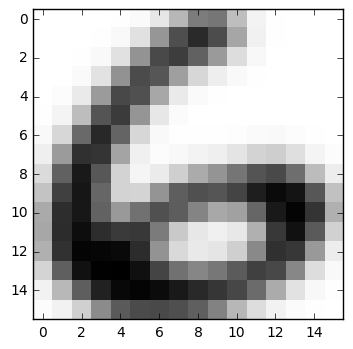

In [9]:
#this is how you plot each image
images = D['train_patterns']

def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='nearest', cmap=cm.Greys)
show(images[:, 0])


In [14]:
#This is how label is read
labels = D['train_labels'].T
#this is how they represent 6
print labels[0] 
print labels[0,6]

def make_class(c):
    return list(c).index(1)
labels = np.array([make_class(lb) for lb in labels])
print labels #more readable

[-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
1
[6 0 1 ..., 9 2 7]


1 ) Find principal components of the train dataset. Print out first 5 vectors.

In [16]:
images[:5]

array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       [-0.99946642, -0.99628389, -0.99998736, ..., -0.97369099,
        -0.75660157, -0.77581352],
       [-0.99005735, -0.94368517, -0.99870199, ..., -0.85942686,
        -0.31030527, -0.53804946]])

2) Plot the variance explained by $k$ principal with largest variance VS $k$. The variance explained by $k$ eigenvector is given by (remember that you can add the variance).
$$ \text{Explained Variance} = \frac{\displaystyle\sum_{i=0}^k \lambda_i}{\displaystyle\sum_{i=0}^n \lambda_i}$$

where $n$ is the total number of principal component

In [17]:
def norm(xs):
    mean = np.mean(xs, axis = 1)
    norm_xs = xs - mean[:,np.newaxis]
    norm_xs = norm_xs / np.std(norm_xs, axis = 1)[:, np.newaxis]
    return norm_xs

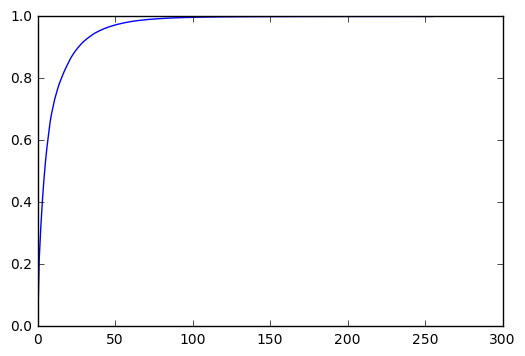

In [31]:
norm_images = norm(images)
cov = np.cov(norm_images)
evals, evecs = np.linalg.eigh(cov)
evals = evals[::-1]
evecs = evecs[::-1]
sum_ = sum(evals)
xs = [k for k in range(len(evals))]
ys = [(sum(evals[:k]) / sum_) for k in xs]
plt.plot(xs,ys)

3) If we want to explain 85% of the variance how many principal component do we need.

In [36]:
for i, x in enumerate(ys):
    if x > 0.85:
        print i
        break

20


4) For all train images find the feature in new coordinate. The number of principal component you should use is what you found in 3)

In [39]:
new_feature_train = np.dot(evecs[:20], norm_images)
new_feature_train[0]

array([-0.54609889,  1.68242025, -0.39823105, ..., -0.02624273,
       -0.95832921, -0.60372831])

5) We want to classify this with ECOC using One VS One matrix. 

Use scikit learn(make sure you are using recent version) to do this. Try use SVM(any kernel you want). We will learn how the SVM magic work later. 

http://scikit-learn.org/stable/modules/svm.html

Find E_out from your test data set.

In [40]:
from sklearn import svm

In [44]:
s = svm.SVC(decision_function_shape="ovo", verbose = True)
s.fit(new_feature_train.T, labels)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [57]:
norm_test_images = norm(D['test_patterns'])
test_labels = D['test_labels'].T
test_labels = np.array([make_class(lb) for lb in test_labels])
new_feature_test = np.dot(evecs[:20], norm_test_images) # getting the new feature

_, nimages = new_feature_test.shape

In [58]:
right = 0.
wrong = 0.

for i in range(nimages):
    p = s.predict(new_feature_test[:,i].reshape(1, -1))[0]
    if p == test_labels[i]:
        right+=1
    else:
        wrong+=1
print "E out =", right / (right + wrong)

E out = 0.916326091633
